[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sakamakik-outlook/llm-demo/blob/master/openai-api-04-embedding.ipynb)

In [47]:
!pip install scikit-learn
!pip install openai

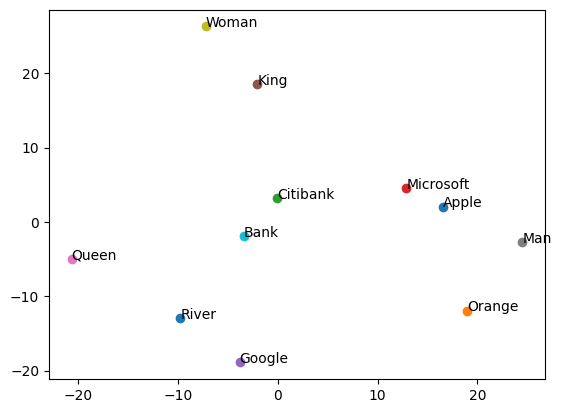

In [56]:
import openai
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Set up the OpenAI API client
openai.api_key = "sk-dfada"
model = "text-embedding-ada-002"

# Define the inputs to embed
#inputs = [ "Bank", "JP Borgan", "Morgan Stanley", "CitiBank", "River", "Apple", "Orange", "Google", "Microsoft", "King", "Queen","Man", "Woman"]
inputs = [ "Apple", "Orange", "Citibank", "Microsoft", "Google", "King", "Queen","Man", "Woman", "Bank", "River"]

# Embed the inputs using OpenAI's API
embeddings = []
for input in inputs:
    embedding = openai.Embedding.create(input=[input], model=model)['data'][0]['embedding']
    embeddings.append(embedding)

# Concatenate the embeddings into a single array
embeddings = np.concatenate(embeddings, axis=0)

# Reshape the embeddings array to have two dimensions
matrix = embeddings.reshape(-1, 16)

# Apply t-SNE to reduce the dimensionality of the embeddings to 2D
tsne = TSNE(n_components=2, perplexity=60, random_state=2, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Plot the embeddings in 2D space
fig, ax = plt.subplots()
for i, input in enumerate(inputs):
    ax.scatter(vis_dims[i, 0], vis_dims[i, 1], label=input)
    ax.annotate(input, (vis_dims[i, 0], vis_dims[i, 1]))


plt.show()